In [ ]:
import numpy as np   #Linear algera Library
import pandas as pd
import matplotlib.pyplot as plt  #to plot graphs
import seaborn as sns  #to plot graphs
from sklearn.linear_model import LinearRegression   #for linear regression model
sns.set()  #setting seaborn as default
import math

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Stock/dataset/INDIAVIX.csv")   #reads the input data
data.head()   #displays the first five rows

,Date,Open,High,Low,Close,Previous,Change,%Change
0,2009-03-02,43.19,43.38,41.44,43.17,NaN,0.00,0.0000
1,2009-03-03,43.17,43.90,41.20,43.89,43.17,0.72,0.0167
2,2009-03-04,43.89,43.89,42.16,42.52,43.89,-1.37,-0.0312
3,2009-03-05,42.52,42.71,40.41,41.49,42.52,-1.03,-0.0242
4,2009-03-06,41.49,41.49,37.57,38.16,41.49,-3.33,-0.0803


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3061 entries, 0 to 3060
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3061 non-null   object 
 1   Open      3061 non-null   float64
 2   High      3061 non-null   float64
 3   Low       3061 non-null   float64
 4   Close     3061 non-null   float64
 5   Previous  3060 non-null   float64
 6   Change    3061 non-null   float64
 7   %Change   3061 non-null   float64
dtypes: float64(7), object(1)
memory usage: 191.4+ KB


In [ ]:
data.describe(include ='all')

,Date,Open,High,Low,Close,Previous,Change,%Change
count,3061,3061.000000,3061.000000,3061.000000,3061.000000,3060.000000,3061.000000,3061.000000
unique,3061,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2009-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,19.894746,20.798952,18.502052,20.017361,20.020798,-0.010049,0.000932
std,NaN,7.741704,8.229533,7.509976,7.850984,7.850998,1.254809,0.052442
min,NaN,0.000000,0.000000,0.000000,10.447500,10.447500,-12.470000,-0.339200
25%,NaN,14.965000,15.492500,13.662500,14.965000,14.972500,-0.500000,-0.027400
50%,NaN,17.840000,18.550000,16.550000,17.877500,17.878750,-0.050000,-0.002700
75%,NaN,22.495000,23.490000,20.950000,22.580000,22.585000,0.460000,0.024700


In [ ]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Previous,1
Change,0
%Change,0


In [ ]:
data.head()

,Date,Open,High,Low,Close,Previous,Change,%Change
0,2009-03-02,43.19,43.38,41.44,43.17,NaN,0.00,0.0000
1,2009-03-03,43.17,43.90,41.20,43.89,43.17,0.72,0.0167
2,2009-03-04,43.89,43.89,42.16,42.52,43.89,-1.37,-0.0312
3,2009-03-05,42.52,42.71,40.41,41.49,42.52,-1.03,-0.0242
4,2009-03-06,41.49,41.49,37.57,38.16,41.49,-3.33,-0.0803


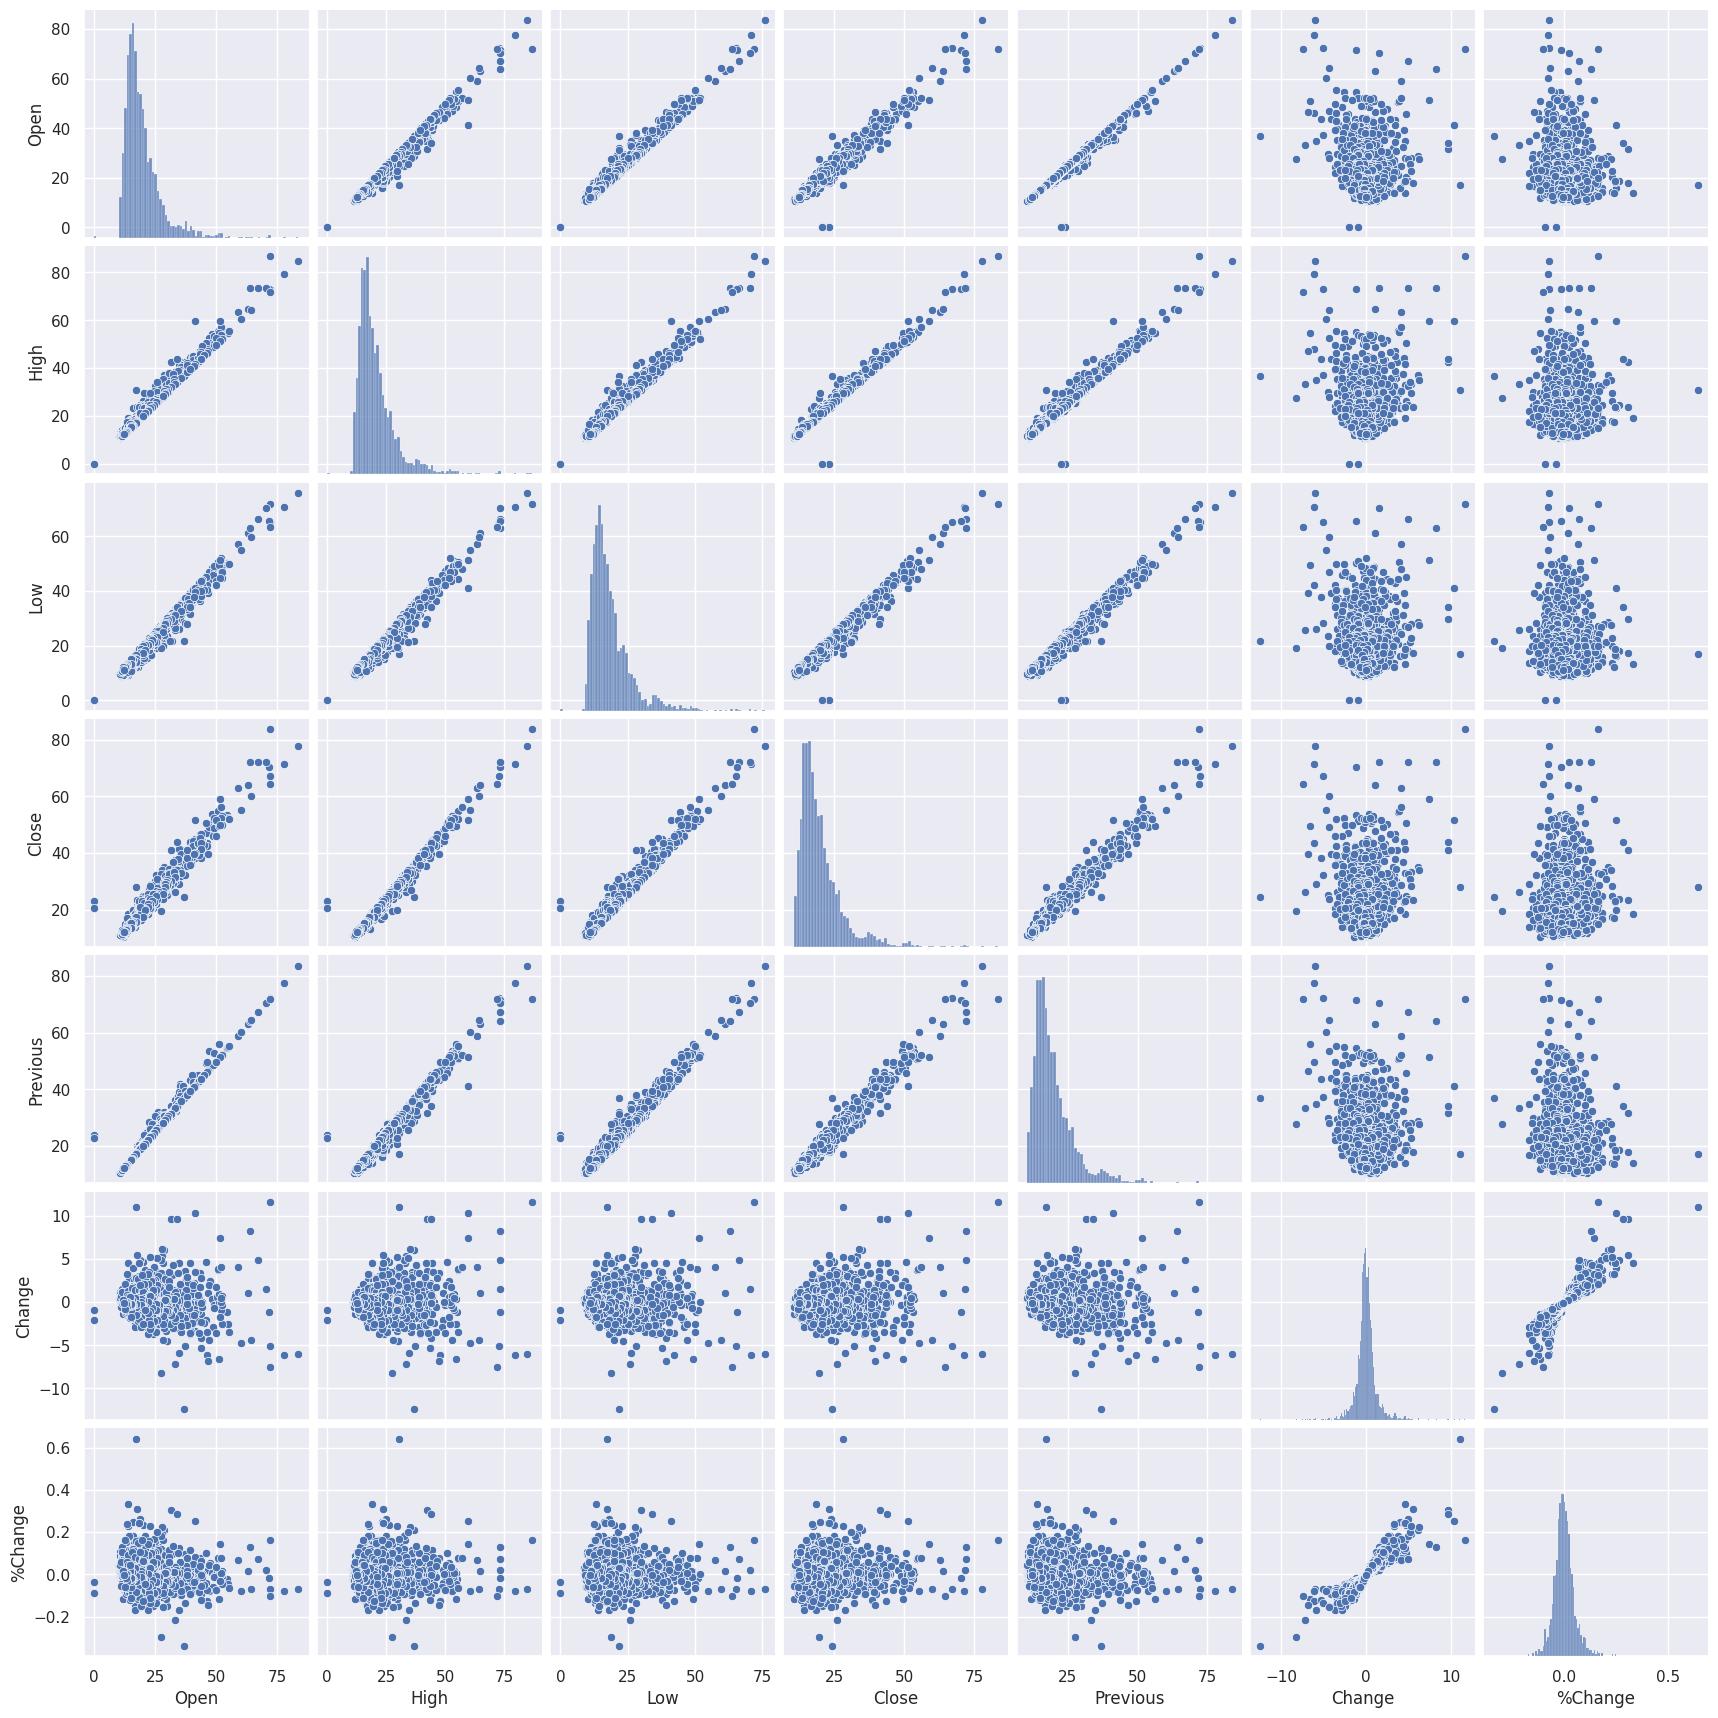

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
x=data[['Date','Open','High','Low','Close','Previous','Change','%Change']].values

In [ ]:
y=data[['Close']].values

In [ ]:
from sklearn.model_selection import train_test_split
#split to train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

# Extract year, month, day, day of the week from the Date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_week'] = data['Date'].dt.dayofweek  # Monday=0, Sunday=6

In [ ]:
X = data[['Open', 'High', 'Low', 'Previous', 'Change', '%Change', 'Year', 'Month', 'Day', 'Day_of_week']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Training data size: {len(X_train)}")
print(f"Test data size: {len(X_test)}")

Training data size: 2448
Test data size: 613


In [ ]:
#using linear regression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
lm.coef_

array([[-2.25193957e-03,  2.86760116e-03,  9.40933612e-04,
         9.98365374e-01,  9.98440854e-01, -2.46881680e-02,
        -5.82136343e-05,  3.17780929e-04,  8.13851283e-06,
         2.12416180e-04]])

In [ ]:
#values from 0 to 1
#0 model explain None of the variability
#1 model explain Entire of the variability
lm.score(X_train,y_train)

0.9999519396902584

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')  # Use 'median' or other strategies if more appropriate

# Fit and transform the training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
#predict the output(predictions) using the test data
predictions = lm.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9846709621033625

In [ ]:
#load actual and predecited values side by side
dframe=pd.DataFrame({'actual':y_test.flatten(),'Predicted':predictions.flatten()})
#flatten toget single axis of data (1 dimension only)

In [ ]:
dframe.head(15)

,actual,Predicted
0,16.0350,16.030023
1,23.3500,23.354040
2,13.4675,13.467361
3,17.4200,17.417799
4,17.4375,17.438601
5,37.3800,37.377623
6,20.4300,20.424579
7,26.5075,26.506738
8,22.5800,22.576925
9,14.0200,14.021666


Text(0, 0.5, 'Closing price')

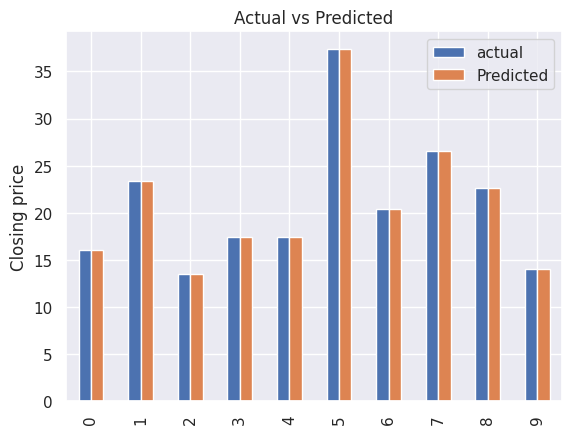

In [ ]:
graph =dframe.head(10)
graph.plot(kind='bar')
plt.title('Actual vs Predicted')
plt.ylabel('Closing price')

Text(0, 0.5, 'Predicted')

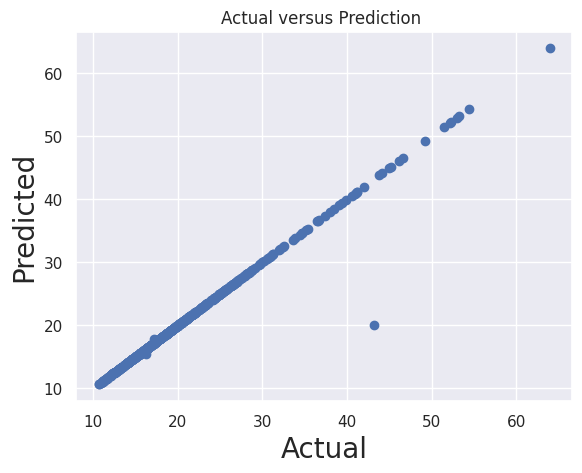

In [ ]:
#using scatter plot compare the actual and predicted data
fig = plt.figure()
plt.scatter(y_test,predictions)
plt.title('Actual versus Prediction ')
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Predicted', fontsize=20)

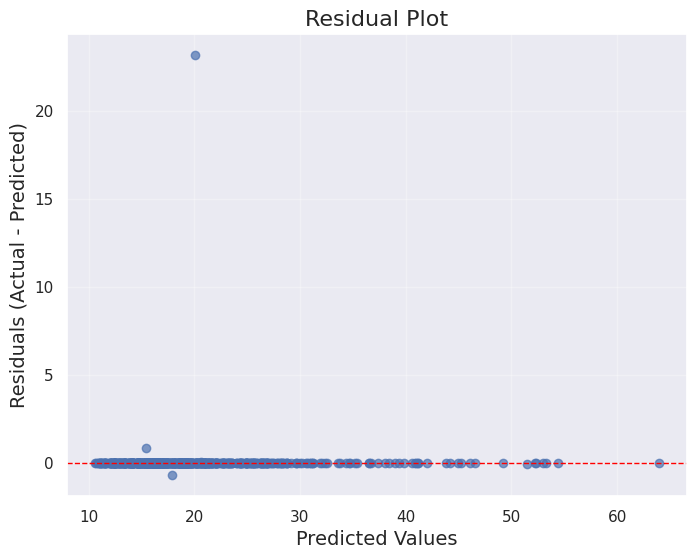

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - predictions

# Create the residual plot
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Horizontal line at residual = 0
plt.title("Residual Plot", fontsize=16)
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Residuals (Actual - Predicted)", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
import math
from sklearn import metrics

In [ ]:
#metrics to find accuracy of continous variables
print('Mean Abs value:' ,metrics.mean_absolute_error(y_test,predictions))
print('Mean squared value:',metrics.mean_squared_error(y_test,predictions))
print('root mean squared error value:',math.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Abs value: 0.04323008881768038
Mean squared value: 0.8751824132713583
root mean squared error value: 0.9355118456071833


In [ ]:
import os
folder_path = '/content/drive/My Drive/your_folder_name'
os.makedirs(folder_path, exist_ok=True)  # This creates the folder if it doesn't exist

# Save the model
model_path = os.path.join(folder_path, 'linear_regression_model.pkl')
dump(lm, model_path)
print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/your_folder_name/linear_regression_model.pkl
